Tarea de Python
Alumno: Josue David Castillo Araiza

In [1]:
from IPython.display import clear_output
!pip install astroquery;

clear_output()

#Tengo que instalar astroquery cada vez que uso colab

In [2]:
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
import numpy as np
import os 
from urllib.request import urlopen
from scipy.integrate import simps
import pandas as pd
import astropy

In [12]:
os.chdir('/content/drive/MyDrive/Josue/Maestria UNAM/Tercer semestre/ClasePython') #Defino el path en mi drive

In [7]:
filename = 'Datos_NGC_6496'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
class Observaciones(object):
  """Este objeto descarga un archivo del inaf. 
    Tiene una funcion para convertirlo a tabla de astropy en la misma descarga.
    A si mismo, guarda los colores calculados a partir de las magnitudes en
    diferentes bandas visibles

  """

  def __init__(self, filename):
    self.filename = filename
    self.dlfile()
    self.data= self.dlfile()
    self.colors = self.adds()


  def dlfile(self):
    #if not os.path.exists(self.filename):
    catalog_list = Vizier.find_catalogs('NGC 6496')
    Vizier.ROW_LIMIT = -1
    catalogs = Vizier.get_catalogs('J/AJ/145/165')
    Table = catalogs['J/AJ/145/165/table2']
    Table.write(self.filename, format='csv', overwrite = True)
    return Table


  def adds(self):
    table_Pandas = self.dlfile()
    table_Pandas['BV'] = table_Pandas['Bmag'] - table_Pandas['Vmag']
    table_Pandas['VI'] = table_Pandas['Vmag'] - table_Pandas['Imag']
    table_Pandas['VR'] = table_Pandas['Vmag'] - table_Pandas['Rmag']
    return table_Pandas


In [9]:
sp1 = Observaciones(filename) #Aqui inicializo la clase

In [117]:
class Isocronas(object):
  
  def __init__(self):
    self.file = self.filef()
    self.colors = self.addColorsf()


  def filef(self):
    dataPand = pd.read_csv('isocrons.dat', engine = 'python', sep = '\s+', comment = '#')
    ###Aqui es necesario borrar el # antecesor de la fila de encabezado, ya que de otra forma
    ###considera que el header es comentario 
    return dataPand
 
  def addColorsf(self):
    """
    Devuelve el archivo con la edad en GY y 3 tablas de colores
    """

    dataPand = self.filef()
    BV_iso = dataPand['Bmag']-dataPand['Vmag']
    dataPand['BV'] = BV_iso

    VI_iso = dataPand['Vmag']-dataPand['Imag']
    dataPand['VI'] = VI_iso 

    VR_iso = dataPand['Vmag']-dataPand['Rmag']
    dataPand['VR'] = VR_iso

    age = 10**dataPand['logAge']
    dataPand['Age'] = age

    return dataPand

In [126]:
sp2 = Isocronas()

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag,BV,VI,VR,Age
7932,0.003852,-0.6,10.00000,0.090000,1.081690,0.090,-3.305,3.4143,5.306,1,0.000,0.545,0.0,0.0,0.0,0.0,0.0,-1,-4.620000e-17,0.0,0.7388,0.2574,0.000700,0.000189,0.001712,-1.0,0.003891,13.032,22.343,19.610,17.592,15.285,12.996,10.901,10.473,10.261,2.018,4.596,2.307,1.000000e+10
7933,0.003852,-0.6,10.00000,0.093255,1.112159,0.093,-3.234,3.4242,5.290,1,0.000,0.545,0.0,0.0,0.0,0.0,0.0,-1,-5.450000e-17,0.0,0.7385,0.2576,0.000700,0.000189,0.001712,-1.0,0.003891,12.854,21.783,19.174,17.184,14.984,12.761,10.745,10.302,10.082,1.990,4.423,2.200,1.000000e+10
7934,0.003852,-0.6,10.00000,0.099955,1.170733,0.100,-3.095,3.4437,5.259,1,0.000,0.545,0.0,0.0,0.0,0.0,0.0,-1,-7.510000e-17,0.0,0.7381,0.2580,0.000700,0.000189,0.001712,-1.0,0.003891,12.506,20.485,18.146,16.243,14.309,12.261,10.454,9.975,9.741,1.903,3.982,1.934,1.000000e+10
7935,0.003852,-0.6,10.00000,0.116465,1.295559,0.116,-2.866,3.4714,5.208,1,0.000,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.250000e-16,0.0,0.7370,0.2591,0.000700,0.000189,0.001712,-1.0,0.003891,11.936,18.664,16.674,14.871,13.279,11.513,9.966,9.446,9.200,1.803,3.358,1.592,1.000000e+10
7936,0.003852,-0.6,10.00000,0.119866,1.318432,0.120,-2.823,3.4766,5.198,1,0.000,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.370000e-16,0.0,0.7368,0.2593,0.000700,0.000189,0.001712,-1.0,0.003891,11.828,18.340,16.410,14.625,13.089,11.378,9.874,9.348,9.101,1.785,3.247,1.536,1.000000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11096,0.004831,-0.5,10.17609,0.836005,2.430695,0.585,2.820,3.5929,0.709,7,0.000,0.466,0.0,0.0,0.0,0.0,0.0,-1,-1.260000e-07,0.0,0.7277,0.2661,0.000742,0.000350,0.002124,-1.0,0.006149,-2.281,2.247,0.386,-1.210,-2.086,-2.809,-3.876,-4.686,-4.849,1.596,1.599,0.876,1.499996e+10
11097,0.004831,-0.5,10.17609,0.836009,2.430697,0.555,2.869,3.5943,0.643,7,0.000,0.463,0.0,0.0,0.0,0.0,0.0,-1,-1.850000e-07,0.0,0.7277,0.2661,0.000737,0.000356,0.002124,-1.0,0.006169,-2.402,2.150,0.264,-1.341,-2.216,-2.935,-3.998,-4.799,-4.963,1.605,1.594,0.875,1.499996e+10
11098,0.004831,-0.5,10.17609,0.836011,2.430697,0.531,2.901,3.6023,0.624,7,0.000,0.461,0.0,0.0,0.0,0.0,0.0,-1,-2.430000e-07,0.0,0.7276,0.2661,0.000734,0.000360,0.002124,-1.0,0.006208,-2.482,1.878,0.058,-1.517,-2.358,-3.043,-4.069,-4.839,-4.993,1.575,1.526,0.841,1.499996e+10
11099,0.004831,-0.5,10.17609,0.836013,2.430698,0.506,2.921,3.6206,0.655,7,0.000,0.460,0.0,0.0,0.0,0.0,0.0,-1,-2.900000e-07,0.0,0.7276,0.2661,0.000732,0.000363,0.002124,-1.0,0.006217,-2.534,1.316,-0.282,-1.765,-2.532,-3.152,-4.094,-4.797,-4.929,1.483,1.387,0.767,1.499996e+10


In [15]:
class GraphColores(object):

  #def __init__(self):
   # self.Vmag_color() = self.colorr(ax)
  

  def colorr(self):
    fig, ax = plt.subplots(3, figsize = (4,15),constrained_layout=True, sharey= True, dpi = 80, sharex = True)
    


    ax[0].scatter(x = sp1.colors['BV'], y = sp1.colors['Vmag'], s=0.1, c='k', alpha=0.5 )
    ax[0].set_xlabel("B - V", fontsize = 10)
    ax[1].set_ylabel("Vmag", ha = 'center', va= 'center', fontsize = 15)

    ax[1].scatter(x = sp1.colors['VI'], y = sp1.colors['Vmag'],s=0.1, c='k', alpha=0.5)
    ax[1].set_xlabel("V - I", fontsize = 10)

    ax[2].scatter(x = sp1.colors['VR'], y = sp1.colors['Vmag'],s=0.1, c='k', alpha=0.5)
    ax[2].set_xlabel("V - R", fontsize = 10)
    

    fig.suptitle('Diagrama de color-magnitud (Observaciones)', fontsize=16)

    plt.xlim(0,1.6)
    plt.ylim(24,14)


    

    plt.show()

In [16]:
sp3 = GraphColores()

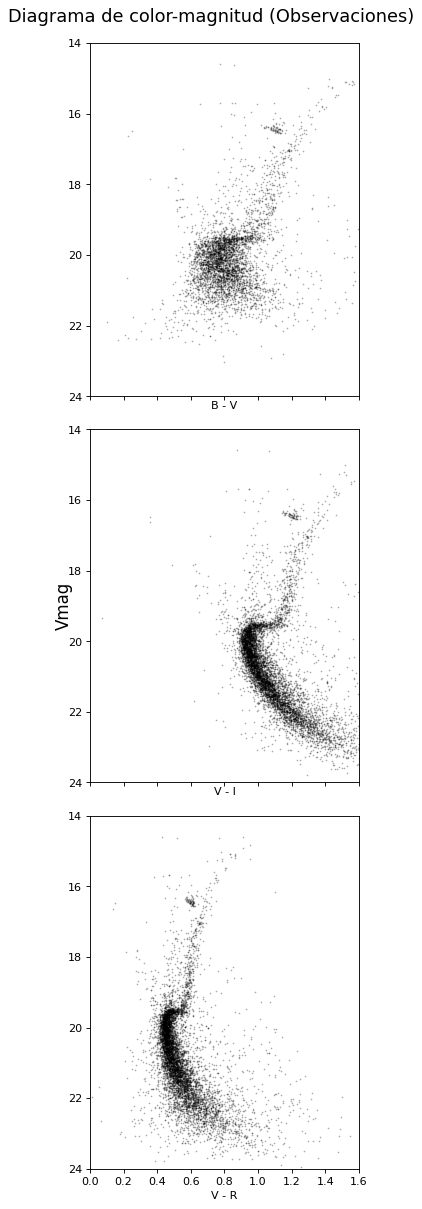

In [17]:
sp3.colorr()

In [18]:
class Mteoricos(object):


  def gTeoricos(self):
    aux2 = sp2.colors.loc[sp2.colors['Age'].between(1.000000e+10, 1.099999e+10, inclusive=True)]
    fig, ax = plt.subplots(3, figsize = (4,15),constrained_layout=True, sharey= True, dpi = 80)
    ax[0].scatter(x = aux2['BV'], y = aux2['Vmag'], s=0.5, c='k', alpha = 0.2 )
    ax[0].set_xlabel("B - V", fontsize = 10)
  
    ax[1].set_ylabel("Vmag", ha = 'center', va= 'center', fontsize = 15)
    ax[1].scatter(x = aux2['VI'], y = aux2['Vmag'],s=0.5, c='k', alpha = 0.2 )
    
    ax[1].set_xlabel("V - I", fontsize = 10)

    ax[2].scatter(x = aux2['VR'], y = aux2['Vmag'],s=0.5, c='k', alpha = 0.2)
    ax[2].set_xlabel("V - R", fontsize = 10)
    plt.ylim(max(aux2['Vmag']-8),min(aux2['Vmag']-5))

    fig.suptitle('Diagrama de color-magnitud (10gyr - 10.9gyr)', fontsize=16)
    plt.show()

In [19]:
sp4 = Mteoricos()

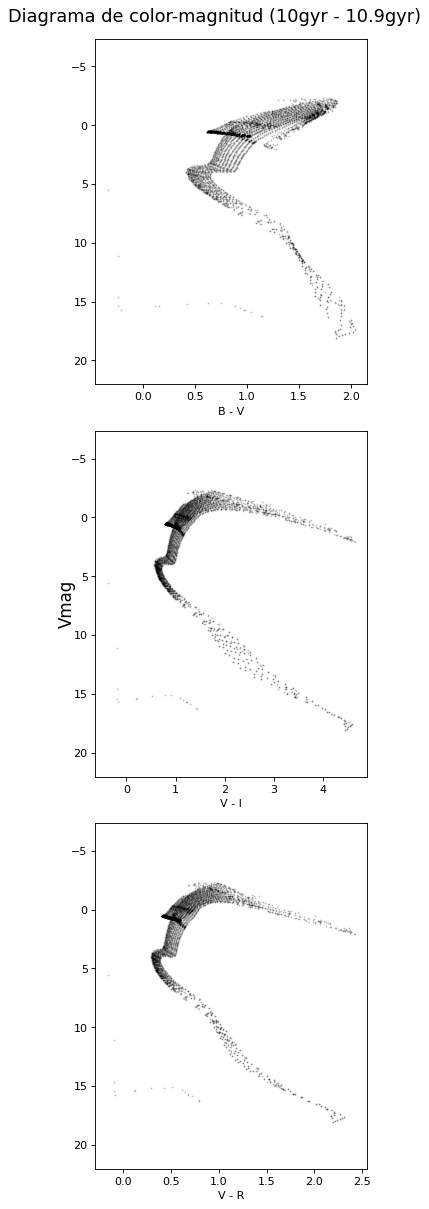

In [20]:
sp4.gTeoricos()

In [194]:
class Ajustes(object):
  """
  Esta calcula las isocronas del modelo.
  Necesitara la edad en GYR, la extincion (av) y la metalicidad deseada
  """


  def ajju(self,age,av,mh):

    
    auxi = sp2.colors.loc[sp2.colors['Age'] == 1.0e+10]
    aux = auxi.loc[auxi['MH'] == mh]

    distance = (10 ** ( (16 + 5 - av) / 5) ) 
    fig, ax = plt.subplots(3, figsize = (4,15),constrained_layout=True, sharey= True, dpi = 80)

    ax[0].scatter(x = aux['BV'] + (1.4 - 1) * av, y = aux['Vmag'] + av + 5 * np.log10(distance) -5, s=0.5, alpha=1.0, c='r')
    ax[0].scatter(x = sp1.colors['BV'], y =sp1.colors['Vmag'], s=0.5, alpha=0.5, c='b')
    ax[0].set_xlabel("B - V", fontsize = 10)
    

    ax[1].scatter(x = aux['VI'] + (1.0 - 0.60) * av, y =aux['Vmag'] + av + 5 * np.log10(distance) -5, s=0.5, alpha=1.0, c='r')
    ax[1].scatter(x = sp1.colors['VI'], y =sp1.colors['Vmag'], s=0.5, alpha=0.5, c='b')
    ax[1].set_xlabel("V - I", fontsize = 10)

    ax[2].scatter(x = aux['VR'] + (1.0 - 0.85) * av, y = aux['Vmag'] + av + 5 * np.log10(distance) -5, s=0.1, alpha=1.0, c='r')
    ax[2].scatter(x = sp1.colors['VR'], y = sp1.colors['Vmag'] , s=0.5, alpha=0.2, c='b')
    ax[2].set_xlabel("V - R", fontsize = 10)
    
    plt.ylim(26,10)


    fig.suptitle('Ajuste de Modelo', fontsize=16)
    plt.show()
    print('El modelo que mejor ajusta es el de: \n' '\n Edad: ', age, 'gyrs', '\n Absorcion: ', av,  '\n Metalicidad: ' , mh )


In [195]:
sp5 = Ajustes()

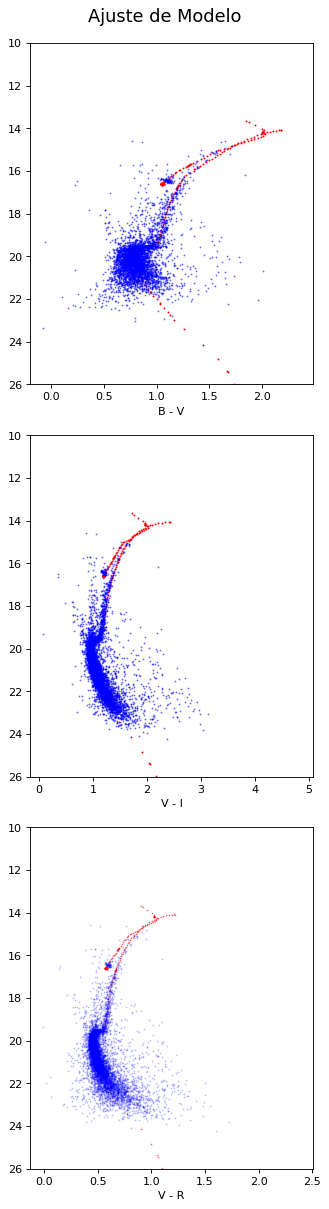

El modelo que mejor ajusta es el de: 

 Edad:  1.1 gyrs 
 Absorcion:  0.8 
 Metalicidad:  -0.7


In [196]:
sp5.ajju(1.1,0.8,-0.7)